# **Residuals**

**Key Assumptions to check with Residuals**

Linear Regression assumes:
1. **Linearity:** The relationship between features (e.g, MedInc) and target (Price) is a  straight line.
2. **Constant Variance** (Homoscedasticity)**:** Residuals have similar spread across all predicted values --- not fanning out or clustering.
3. **Normality:** Residuals are roughly bell-shaped (normal distribution) --- no weird skew.
4. **Independence:** Residuals don't follow a pattern over time or order (less relevant here, no time data).



*   **Positive Residual:** Model underpredicted (e.g., 0.560 = $56K too low).

*  **Negative Residual:** Model overpredicted (e.g., -0.564 = $56K too high).







In [ ]:
# Residual Analysis

#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
#load data
california=fetch_california_housing()
df=pd.DataFrame(california.data,columns=california.feature_names)
df['Price']=california.target

x=df.drop('Price',axis=1)
y=df['Price']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

model=LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

#Residuals = actual - predicted
residuals = y_test - y_pred

# Quick peek
print("\nFirst 5 Residuals:")
print(pd.DataFrame({'Actual': y_test[:5], 'Predicted': y_pred[:5], 'Residual': residuals[:5]}))



First 5 Residuals:
        Actual  Predicted  Residual
20046  0.47700   0.719123 -0.242123
3024   0.45800   1.764017 -1.306017
15663  5.00001   2.709659  2.290351
20484  2.18600   2.838926 -0.652926
9814   2.78000   2.604657  0.175343


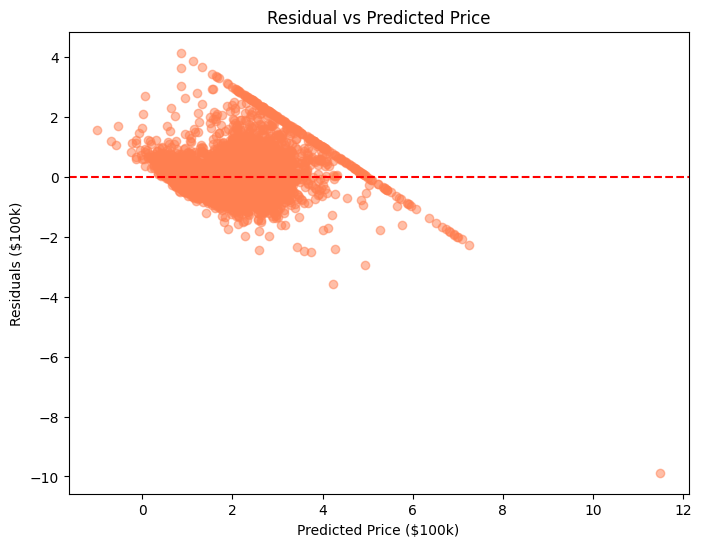

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
plt.scatter(y_pred,residuals,color='coral',alpha=0.5)
plt.axhline(y=0,color='red',linestyle='--')

plt.xlabel('Predicted Price ($100k)')
plt.ylabel('Residuals ($100k)')
plt.title('Residual vs Predicted Price')
plt.show()

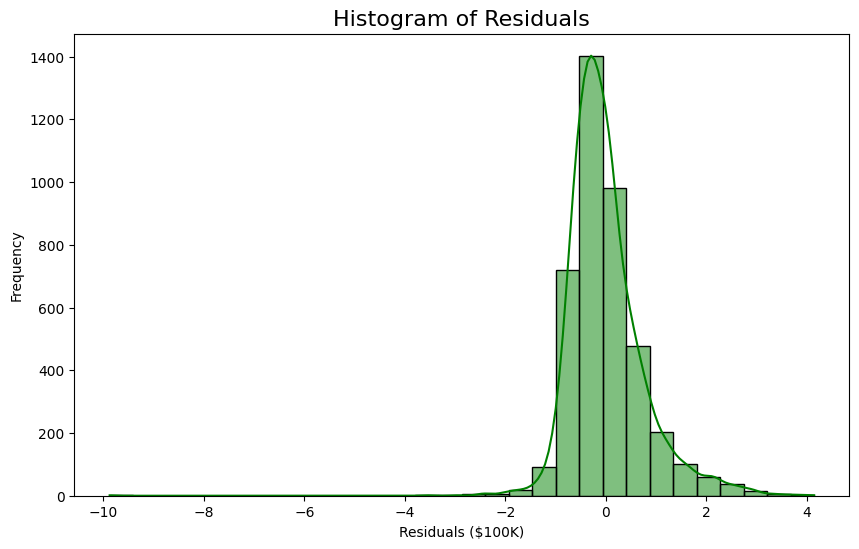

In [ ]:
# Histogram of Residuals

plt.figure(figsize=(10,6))
sns.histplot(residuals,bins=30,kde=True,color='green')
plt.title('Histogram of Residuals', fontsize=16)
plt.xlabel('Residuals ($100K)')
plt.ylabel('Frequency')
plt.show()

# **Q-Q Plot (Normality Check)**

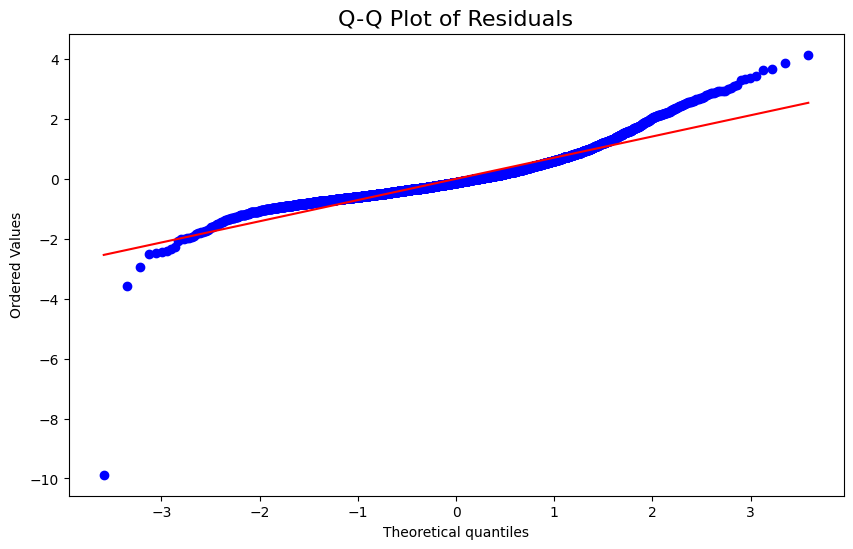

In [ ]:
import scipy.stats as stats

plt.figure(figsize=(10,6))
stats.probplot(residuals, dist="norm",plot=plt)
plt.title('Q-Q Plot of Residuals', fontsize=16)
plt.show()



*   **What to Look for:**
   * Good: Points follow the red line (normal).
   * Bad: Big Deviations
*   **Our case:**
      Mostly linear, but tails curve off------non-normal extremes (capping effect)



**Interpret Residual Analysis**


*   **Linearity:** Scatter plot shows no strong curve ----- assumption holds decently.
*   **Constant Variance:** Slight fanning at higher prices-mild hetero.

*   **Normality:** Histogram and Q-Q plot show approximate normality
*   **Take away:** Model is okay but not perfect-capping and non constant variance and could be issues





# **Standardization vs. Normalization**

1. **Standardization (Z-score Scaling)**
standardization transforms the data to have a mean of 0 and a standard deviation of 1.
      Formula:
            Z = (X - μ) / σ

      Where:
        *   Z: The standardized value
        *   X: The current value
        *   μ: The mean of the data set
        *   σ: The standard deviation of the data set


2. **Normalization**
Normalization transforms data into a fixed range, typically [0,1] or [-1,1].
      Formula:
            X new = (X - X min) / (X max - X min)
      Where:

       *   X: It is a set of the observed values present in X.
       *   X min: It is the minimum values in X

       *   X max: It is the maximum values in X
           







# **Cross-validation: A technique to improve model performance**

Cross-Validation is a technique used to evaluate the performance of a machine learning model by splitting the dataset into multiple subsets for training and testing. This helps in avoiding overfitting and ensures that the model generalizes well to unseen data.

**Why Use Cross-Validation?**



*   Prevents overfitting
*   Ensures the model is evaluated on different subsets of the data.

*   Provides a more reliable performance across all K iterations

**1. K-Fold Cross-Validation (Most Common)**

How it Works?


*   Split the dataset into K equal-sized folds.
*   Train the model on K-1 folds and test on the remaining folds.


*   Repeat the process for K times, each time using the different fold as the test set.
*   Compute the average performance across all k-iterations.









In [ ]:
# K-Fold Cross-Validation

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Generate synthetic data
X,y = make_regression(n_samples=100, n_features=2, noise=50)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
print("Cross-Validation Scores:", scores)
print("Average Score:", scores.mean())

Cross-Validation Scores: [0.27393581 0.42522519 0.55152646 0.54200657 0.2924467 ]
Average Score: 0.41702814510233976


**What is Ridge Regression?**

**Ridge Regression** is a twist on regular Linear Regression that helps predict numbers (like test scores or sales) by drwaing a straight line through your data. But here's the big difference: it adds a "penalty" to stop the line from getting too crazy or overreacting to weird data points. It's like telling your model, "Chill out a bit ----- don't go overboard fitting every single dot perfectly!"



*   **In Short**: Ridge Regression is Linear Regression with a rule to keep the predictions steady and avoid overfitting.



